In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
    
california = fetch_california_housing()

In [42]:
print(california.DESCR)
# print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [43]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [44]:
concat_california_array = np.concatenate((california.data, np.reshape(california.target, (california.target.shape[0],1))), axis = 1)

california_df = pd.DataFrame(concat_california_array, columns = california.feature_names + ['price'])

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [45]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [46]:
california_df.info() # пропусков нет
california_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [47]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    
    mse_tr = mean_squared_error(y_train, model.predict(X_train))
    rmse_tr = math.sqrt(mse_tr)
    
    mse_ts = mean_squared_error(y_test, model.predict(X_test))
    rmse_ts = math.sqrt(mse_ts)
    
    print("RMSE TRAIN:", rmse_tr)
    print("RMSE TEST:", rmse_ts)

    print("R2 TRAIN:", r2_score(y_train, model.predict(X_train)))
    print("R2 TEST:", r2_score(y_test, model.predict(X_test)))
    
#     return model.score(X_train, y_train), model.score(X_test, y_test)



In [48]:
columns = ['MedInc',
    'HouseAge',
    'AveRooms',
    'AveBedrms',
    'Population',
    'AveOccup',
    'Latitude',
    'Longitude'
]

target = ['price']

In [49]:
get_score(california_df[columns], california_df[target])
# RMSE - высокая, R2 - средний. Тестовый результат ниже тренирововчного. Переобучение.

RMSE TRAIN: 0.7196757085831575
RMSE TEST: 0.7455813830127763
R2 TRAIN: 0.6125511913966952
R2 TEST: 0.575787706032451


Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

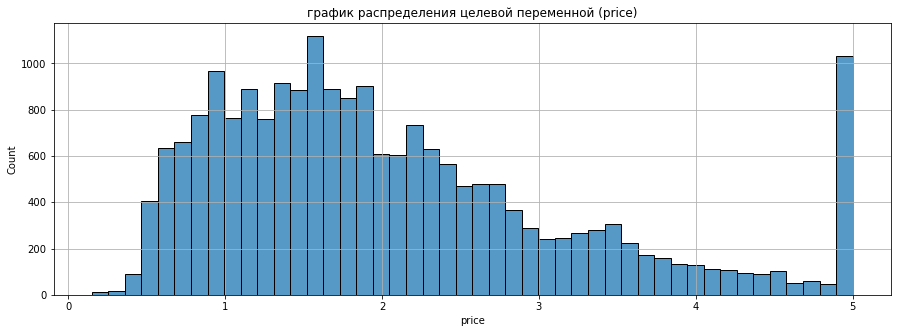

In [50]:
sns.histplot(data=california_df, x='price')

plt.title('график распределения целевой переменной (price)')
plt.grid()

In [51]:
# выбросы в целевой переменной отсутсвуют

In [52]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass  
   

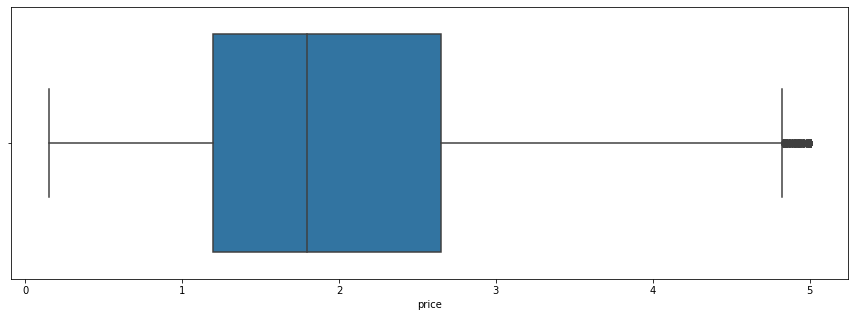

In [53]:
get_boxplot(california_df, columns=['price'])

In [54]:
# get_pairplot(california_df)

Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
- a. Сделайте выводы.
- b. Удалите признаки на основании полученных значений, выводов.
- c. Повторите п. 3, п. 4 на измененных данных.

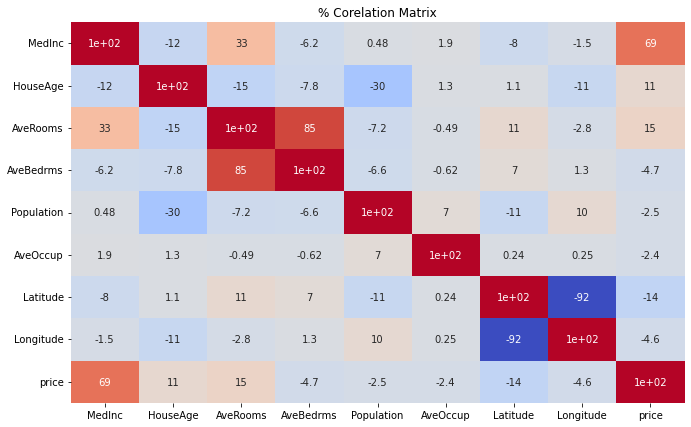

In [55]:
plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=california_df.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [56]:
# широта и долгота имеют сильную отрицательню корреляцию, поэтому можно удалить один из данных признаков.
# ср.доход в группе напрямую влияет на целеыой показатель стоимости дома.

In [57]:
california_df.drop(columns=['Latitude'], inplace=True)

In [58]:
columns = ['MedInc',
    'HouseAge',
    'AveRooms',
    'AveBedrms',
    'Population',
    'AveOccup',
    'Longitude'
]

In [59]:
get_score(california_df[columns], california_df[target])

RMSE TRAIN: 0.7780221694598236
RMSE TEST: 0.8010837880530364
R2 TRAIN: 0.5471810575363253
R2 TEST: 0.5102786640374892


In [60]:
# результат ухудшился..... 

Исследуйте оставленные признаки на выбросы.
- a. Удалите выбросы в случае обнаружения.
- b. Повторите п. 3, п. 4 на измененных данных.

In [61]:
california_df.head()
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,-114.310000,5.000010


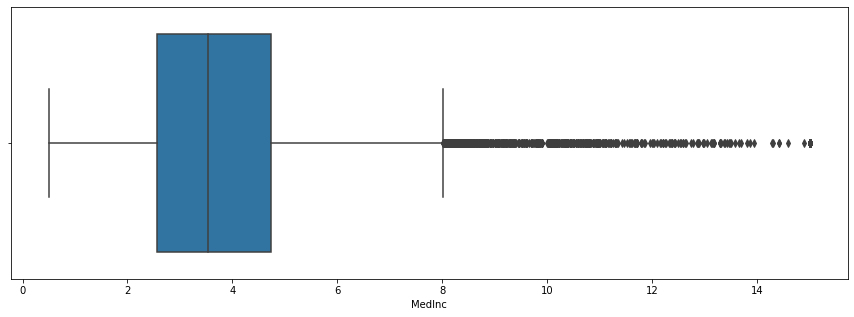

In [62]:
get_boxplot(california_df, columns=['MedInc']) 


In [63]:
california_df = california_df[(california_df['MedInc'] < 10)]
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
count,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000,20331.000000
mean,3.749416,28.627318,5.387297,1.097336,1430.880626,3.011484,-119.567536,2.026699
std,1.623413,12.554780,2.461085,0.476654,1135.305635,5.816168,2.003658,1.108811
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,-124.350000,0.149990
25%,2.552200,18.000000,4.427396,1.006414,791.000000,2.427280,-121.785000,1.188000
50%,3.509600,29.000000,5.206186,1.049046,1170.000000,2.817382,-118.500000,1.778000
75%,4.675950,37.000000,6.007216,1.100000,1729.000000,3.286035,-118.010000,2.598000
max,9.907100,52.000000,141.909091,34.066667,35682.000000,599.714286,-114.310000,5.000010


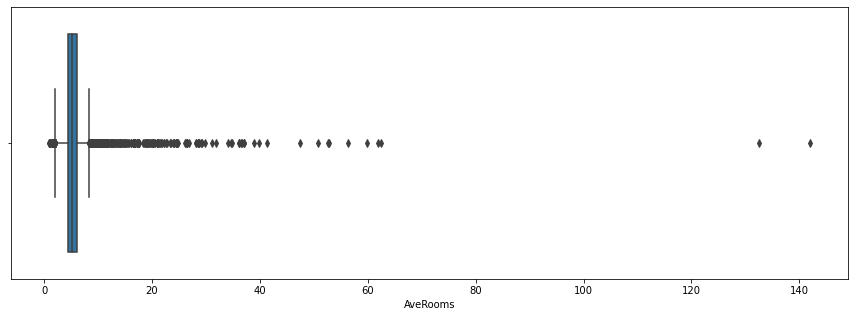

In [64]:
get_boxplot(california_df, columns=['AveRooms'])

In [65]:
california_df = california_df[(california_df['AveRooms'] < 8)]
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
count,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000,19775.000000
mean,3.709408,28.877674,5.177569,1.061394,1442.794235,2.980460,-119.577744,2.012570
std,1.577802,12.480362,1.109848,0.109229,1134.742894,4.419521,1.999389,1.094431
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,-124.350000,0.149990
25%,2.539850,19.000000,4.403043,1.005175,804.000000,2.428492,-121.795000,1.185000
50%,3.487500,29.000000,5.164134,1.047344,1181.000000,2.819876,-118.490000,1.774000
75%,4.636400,37.000000,5.934123,1.095957,1740.500000,3.291182,-118.020000,2.575000
max,9.893700,52.000000,7.995506,3.099338,35682.000000,599.714286,-114.550000,5.000010


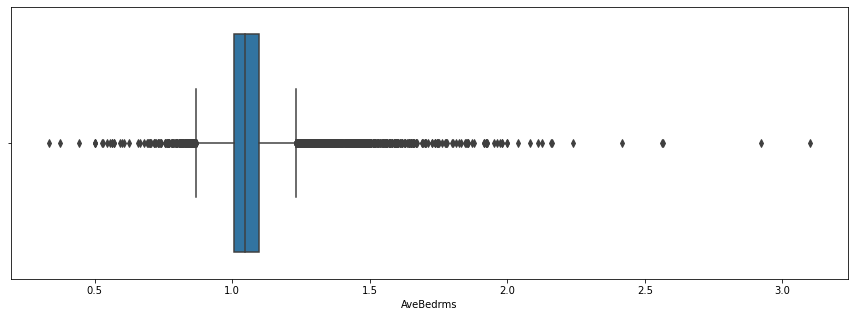

In [66]:
get_boxplot(california_df, columns=['AveBedrms'])
# после удаления выбросов AveRooms данные стали похожи на правду

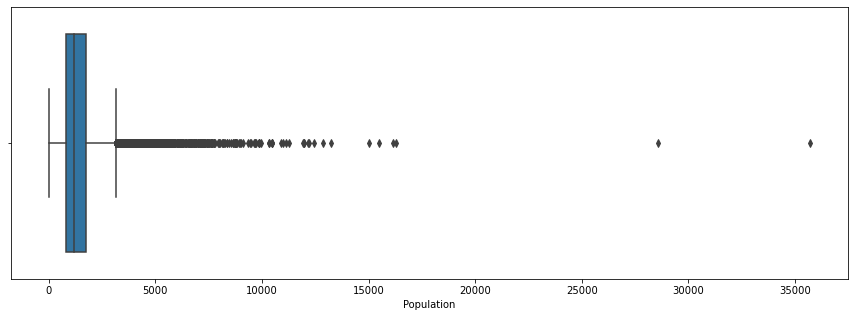

In [67]:
get_boxplot(california_df, columns=['Population'])

In [68]:
california_df = california_df[(california_df['Population'] < 3500)]
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
count,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000,18914.000000
mean,3.699931,29.417733,5.175589,1.061077,1274.411230,2.929536,-119.601159,2.014950
std,1.577982,12.331226,1.101206,0.110885,681.725433,1.080754,2.001355,1.103546
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,-124.350000,0.149990
25%,2.533350,19.000000,4.408145,1.003626,787.000000,2.419323,-121.810000,1.173000
50%,3.477300,30.000000,5.158880,1.046845,1149.000000,2.807539,-118.520000,1.773000
75%,4.625000,38.000000,5.925787,1.096188,1644.000000,3.276456,-118.030000,2.583000
max,9.893700,52.000000,7.995506,3.099338,3497.000000,63.750000,-114.550000,5.000010


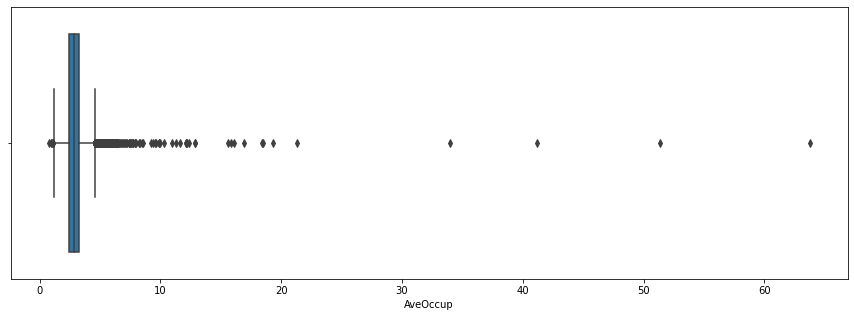

In [69]:
get_boxplot(california_df, columns=['AveOccup'])

In [70]:
california_df = california_df[(california_df['AveOccup'] < 7)]
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
count,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000,18866.000000
mean,3.701054,29.417312,5.177054,1.061067,1274.347874,2.901706,-119.601591,2.016093
std,1.577086,12.323094,1.099736,0.110236,680.874777,0.737049,2.001269,1.103800
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,-124.350000,0.149990
25%,2.535325,19.000000,4.409024,1.003744,787.000000,2.417396,-121.810000,1.173000
50%,3.478050,30.000000,5.159960,1.046845,1149.000000,2.805960,-118.520000,1.775000
75%,4.625000,38.000000,5.926321,1.096081,1644.000000,3.272489,-118.030000,2.583000
max,9.893700,52.000000,7.995506,3.099338,3497.000000,6.954023,-114.550000,5.000010


In [71]:
get_score(california_df[columns], california_df[target])
# модель на тесте выдает более высокий результат, чем на обучении. Результат теста улучшился на 0,1.

RMSE TRAIN: 0.7088969232788055
RMSE TEST: 0.706579643367392
R2 TRAIN: 0.5861140665797564
R2 TEST: 0.5955855109267445


Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
- a. Повторите п. 3, п. 4 на измененных данных.

In [72]:
# for col in california_df['MedInc']:
#     california_df['MedInc_2'] = california_df['MedInc']**2
# #     print(california_df)
# california_df

In [73]:
california_df['MedInc'] *= california_df['MedInc']

In [74]:
california_df['AveOccup'] *= 1.5

In [75]:
california_df['HouseAge'] /= 1.5

In [76]:
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,price
0,69.308955,27.333333,6.984127,1.023810,322.0,3.833333,-122.23,4.526
1,68.913242,14.000000,6.238137,0.971880,2401.0,3.164763,-122.22,3.585
3,31.844578,34.666667,5.817352,1.073059,558.0,3.821918,-122.25,3.413
4,14.793254,34.666667,6.281853,1.081081,565.0,3.272201,-122.25,3.422
5,16.295754,34.666667,4.761658,1.103627,413.0,3.209845,-122.25,2.697


In [77]:
get_score(california_df[columns], california_df[target])
# точность модели снизилась, ошибка выросла.

RMSE TRAIN: 0.7338769487872819
RMSE TEST: 0.7282878917552756
R2 TRAIN: 0.5564312143573434
R2 TEST: 0.5703541279259532


### результат прогнозирования чуть выше среднего, что говорит о недостаточной обработке данных или не правильно подобранной модели. 
